In [25]:
from headers import *
from DMP_Segment import *

In [26]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/D{0}"

lhlabel = [[] for i in range(10)]
rhlabel = [[] for i in range(10)]
lhseg = [[] for i in range(10)]
rhseg = [[] for i in range(10)]

for i in range(10):
    lhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Label.npy"))
    rhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Label.npy"))
    lhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Seg.npy"))
    rhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Seg.npy"))

action_list = npy.array(['Null','Reach','Place','Return','Pour'])

In [27]:
# FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Data/"
# rhlabels = npy.load(os.path.join(FILE_DIR,"Right_Hand_GT_Labels.npy"))
# lhlabels = npy.load(os.path.join(FILE_DIR,"Left_Hand_GT_Labels.npy"))
# rhseg = npy.load(os.path.join(FILE_DIR,"Right_Hand_GT_Segments.npy"))
# lhseg = npy.load(os.path.join(FILE_DIR,"Left_Hand_GT_Segments.npy"))

In [28]:
hc3 = [[] for i in range(10)]
lh = [[] for i in range(10)]
rh = [[] for i in range(10)]
lhs = [[] for i in range(10)]
rhs = [[] for i in range(10)]

for i in range(10):
    hc3[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"Hand_Coordinates_3D.npy"))
    lh[i] = hc3[i][:,0,:]
    rh[i] = hc3[i][:,2,:]
    lhs[i] = hc3[i][:,1,:]
    rhs[i] = hc3[i][:,3,:]

In [29]:
npy.save("LHC.npy",lh)
npy.save("RHC.npy",rh)

In [30]:
consider = 'Reaching'
consider_ind = 1
# consider = 'Placing'
# consider = 'Return'

In [9]:
lhseg, seglist, lhseg[0][1],lhseg[0][2]

([array([  0,  21,  37,  62,  85, 168, 182, 211, 235]),
  array([  0,  65,  88, 119, 145, 240, 247, 264, 290]),
  array([  0, 189, 204, 225, 250]),
  array([  0, 101, 121, 159, 174, 240]),
  array([  0, 165, 182, 202, 220]),
  array([  0, 170, 184, 205, 225]),
  array([  0,  35,  45,  63,  78, 148, 160, 185, 200]),
  array([  0,  95, 113, 132, 148, 164, 230, 250]),
  array([  0,  20,  35,  56,  70, 170, 186, 209, 230]),
  array([  0,  23,  39,  67,  87, 200, 218, 239, 260])],
 [[1, 5], [1, 5], [1], [1], [1], [1], [1, 5], [1, 4], [1, 5], [1, 5]],
 21,
 37)

In [8]:
seglist = [[] for i in range(10)]
ctr = 0
for k in range(10):
    for i in range(len(lhlabel[k])):
        if lhlabel[k][i]==consider_ind:
            ctr +=1
            seglist[k].append(i)
    
pos = [[] for i in range(ctr)]
ind = 0
for k in range(10):
    citr = 0
    for i in range(len(lhlabel[k])):
        if lhlabel[k][i]==consider_ind:
            print(k,i,lhseg[k][seglist[k][citr]],lhseg[k][seglist[k][citr]+1])
            pos[ind] = lh[k][lhseg[k][seglist[k][citr]]:lhseg[k][seglist[k][citr]+1]]
            ind +=1
            citr +=1


(0, 1, 21, 37)
(0, 5, 168, 182)
(1, 1, 65, 88)
(1, 5, 240, 247)
(2, 1, 189, 204)
(3, 1, 101, 121)
(4, 1, 165, 182)
(5, 1, 170, 184)
(6, 1, 35, 45)
(6, 5, 148, 160)
(7, 1, 95, 113)
(7, 4, 148, 164)
(8, 1, 20, 35)
(8, 5, 170, 186)
(9, 1, 23, 39)
(9, 5, 200, 218)


In [10]:
# # FOR LEFT HAND:
# ctr = 0
# seglist = []
# for i in range(len(lhlabels)):
#     if lhlabels[i]==consider:
#         ctr+=1
#         seglist.append(i)       
#         print(lhseg[i],lhseg[i+1])

# pos = [[] for i in range(ctr)]
# pos = [lh[lhseg[seglist[i]]:lhseg[seglist[i]+1]] for i in range(ctr)]

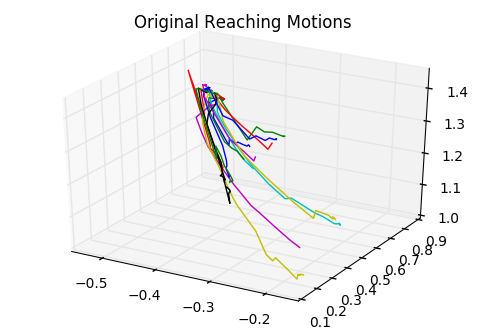

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(ctr):
    ax.plot(pos[i][:,0],pos[i][:,1],pos[i][:,2],linewidth=1)
plt.title("Original {0} Motions".format(consider))
plt.show()

In [7]:
# interp_time = 100
# tr = [range(lhseg[seglist[i]+1]-lhseg[seglist[i]]) for i in range(ctr)]
# trnew = [npy.linspace(0,(lhseg[seglist[i]+1]-lhseg[seglist[i]])-1,interp_time+2) for i in range(ctr)]
# # tr,trnew

In [8]:
# # INTERPOLATE SEGMENTS TO 100 length, linearly. 
# inter_pos = [[] for i in range(ctr)]
# inter_vel = [[] for i in range(ctr)]
# inter_acc = [[] for i in range(ctr)]

# for i in range(ctr):
#     ipos = npy.zeros((interp_time+2,3))
#     posfx = interp1d(tr[i],pos[i][:,0],kind='linear')
#     posfy = interp1d(tr[i],pos[i][:,1],kind='linear')
#     posfz = interp1d(tr[i],pos[i][:,2],kind='linear')
#     ipos[:,0] = posfx(trnew[i])
#     ipos[:,1] = posfy(trnew[i])
#     ipos[:,2] = posfz(trnew[i])

#     inter_vel[i] = npy.diff(ipos,axis=0)[:interp_time]
#     inter_acc[i] = npy.diff(ipos,axis=0,n=2)[:interp_time]
#     inter_pos[i] = ipos[:interp_time]
   

In [14]:
rolltime = 100
dmps = [DMP(100) for i in range(ctr)]

for i in range(ctr):
#     dmps[i].load_trajectory(inter_pos[i],inter_vel[i],inter_acc[i])
    dmps[i].linear_interpolate(pos[i])
    dmps[i].initialize_variables()
    dmps[i].learn_DMP()
    dmps[i].rollout(dmps[i].demo_pos[0],dmps[i].demo_pos[-1],dmps[i].demo_vel[0])
#     dmps[i].rollout(inter_pos[i][0],inter_pos[i][-1],inter_vel[i][0])
#     dmps[i].rollout(npy.zeros(3),npy.ones(3),npy.zeros(3))


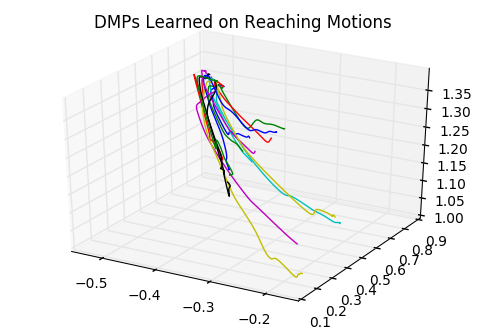

In [20]:
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
for i in range(ctr):
    ax1.plot(dmps[i].pos_roll[:,0],dmps[i].pos_roll[:,1],dmps[i].pos_roll[:,2])
plt.title("DMPs Learned on {0} Motions".format(consider))
plt.show()

In [23]:
for i in range(ctr):
    dmps[i].rollout(npy.zeros(3),npy.ones(3),npy.zeros(3))

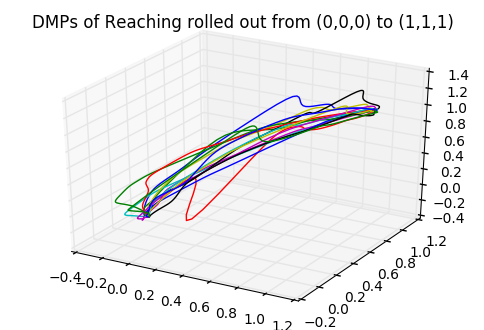

In [24]:
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
for i in range(ctr):
    ax2.plot(dmps[i].pos_roll[:,0],dmps[i].pos_roll[:,1],dmps[i].pos_roll[:,2])
plt.title("DMPs of {0} rolled out from (0,0,0) to (1,1,1)".format(consider))
plt.show()